In [1]:
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 10)
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['legend.fontsize'] = 16
warnings.simplefilter('ignore')

In [2]:
%run plot.py

In [3]:
def get_D2_over_depth_range(D2, depth_range=slice(0, 100), min_obs=50, max_val=1):
    D2_depth = (D2.sel(depth=depth_range).mean('depth')
                  .drop(['nobs_D2_err', 'nobs_D2l', 'nobs_D2t'])
                )
    nobs = D2['nobs_D2l'].sel(depth=slice(0, 100)).sum('depth')
    D2_depth_valid = D2_depth.where(nobs > min_obs)
    D2_depth_valid = D2_depth_valid.where(D2_depth_valid['D2t'] + D2_depth_valid['D2l'] < 1) 
    return D2_depth_valid

In [4]:
def plot_D2_GM(D2, profiles, region='NCAL', depth_range=slice(0, 100)):
    profile = profiles.sel(region=region, season='Annual')
    N_mean = profile['N'].sel(p_mid=depth_range).mean('p_mid')
    OMEGA_EARTH = 7.2921e-5
    f_mean = 2 * OMEGA_EARTH * np.sin(np.pi / 180. * profile['lat_mean'])
    r = xr.IndexVariable('r', np.logspace(0, 2, 101))
    duu_r(r, f=f_mean, N=N_mean, N0=profile['N0'].data, b=profile['b'].data)
    plot_gm_structure_function()

In [5]:
def plot_D2_over_depth_ranges(D2, profile, r_bins=slice(1, 2e2), xlim=[1, 1e2]):
    plt.figure(figsize=(10, 25))
    D2_0_100 = get_D2_over_depth_range(D2, depth_range=slice(0, 100), min_obs=300)
    profile_0_100 = profile.sel(p=slice(0, 100), p_mid=slice(0, 100)).mean(('p', 'p_mid'))
    D2_100_200 = get_D2_over_depth_range(D2, depth_range=slice(100, 200), min_obs=300)
    profile_100_200 = profile.sel(p=slice(100, 200), p_mid=slice(100, 200)).mean(('p', 'p_mid'))
    D2_200_500 = get_D2_over_depth_range(D2, depth_range=slice(200, 300), min_obs=300)
    profile_200_500 = profile.sel(p=slice(200, 500), p_mid=slice(200, 500)).mean(('p', 'p_mid'))
    plt.subplot(311)
    plot_helmholtz_decomposition(D2_0_100.sel(r_bins=r_bins), xlim=xlim)
    plot_gm_structure_function(lat=profile_0_100.lat_mean,
                               N=profile_0_100.N, N0=profile_0_100.N0, b=profile_0_100.b)
    plt.legend(loc='upper left')
    plt.title("Depth range $(0-100\,m)$")
    plt.subplot(312)
    plot_helmholtz_decomposition(D2_100_200.sel(r_bins=r_bins), xlim=xlim)
    plot_gm_structure_function(lat=profile_100_200.lat_mean,
                               N=profile_100_200.N, N0=profile_100_200.N0, b=profile_100_200.b)
    plt.legend(loc='upper left')
    #plot_gm_structure_function()
    plt.title("Depth range $(100-200\,m)$")
    plt.subplot(313)
    plot_helmholtz_decomposition(D2_200_500.sel(r_bins=r_bins), xlim=xlim)
    plot_gm_structure_function(lat=profile_200_500.lat_mean,
                               N=profile_200_500.N, N0=profile_200_500.N0, b=profile_200_500.b)
    plt.legend(loc='upper left')
    #plot_gm_structure_function()
    plt.title("Depth range $(200-500\,m)$")

In [6]:
def plot_D2_over_regions(D2, r_bins=slice(1, 2e2), xlim=[1, 1e2], ax=None, region=''):
    if ax is None:
        ax = plt.gca()
    D2_0_100 = get_D2_over_depth_range(D2, depth_range=slice(0, 100), min_obs=300)
    #
    plot_helmholtz_decomposition(D2_0_100.sel(r_bins=r_bins), xlim=xlim)
    plt.title("Depth range $(0-100\,m),$ " + region)

## Open mean vertical profiles

In [7]:
profiles = xr.open_dataset('/data/RESULTS/VERTICAL_PROFILES/Mean_ARGO_profiles_around_New_Caledonia.nc').sel(season='Annual')

In [8]:
profiles

<xarray.Dataset>
Dimensions:      (p: 58, p_mid: 57, region: 4)
Coordinates:
  * p            (p) float32 2.5 10.0 20.0 30.0 ... 1700.0 1800.0 1900.0 1975.0
    season       <U6 'Annual'
  * p_mid        (p_mid) float64 6.25 15.0 25.0 ... 1.75e+03 1.85e+03 1.938e+03
  * region       (region) object 'NCAL' 'ECAL' 'SCAL' 'VAUB'
Data variables:
    Temperature  (region, p) float32 ...
    Salinity     (region, p) float32 ...
    N            (region, p_mid) float64 ...
    lat_mean     (region) float64 ...
    lon_mean     (region) float64 ...
    sigma0       (region, p) float64 ...
    N0           (region) float64 ...
    Nexp         (region, p_mid) float64 ...
    b            (region) float64 ...
Attributes:
    lon_mean:  165.16666666666666
    lat_mean:  -16.166666666666668

# North of New Caledonia

In [9]:
%pdb off

Automatic pdb calling has been turned OFF


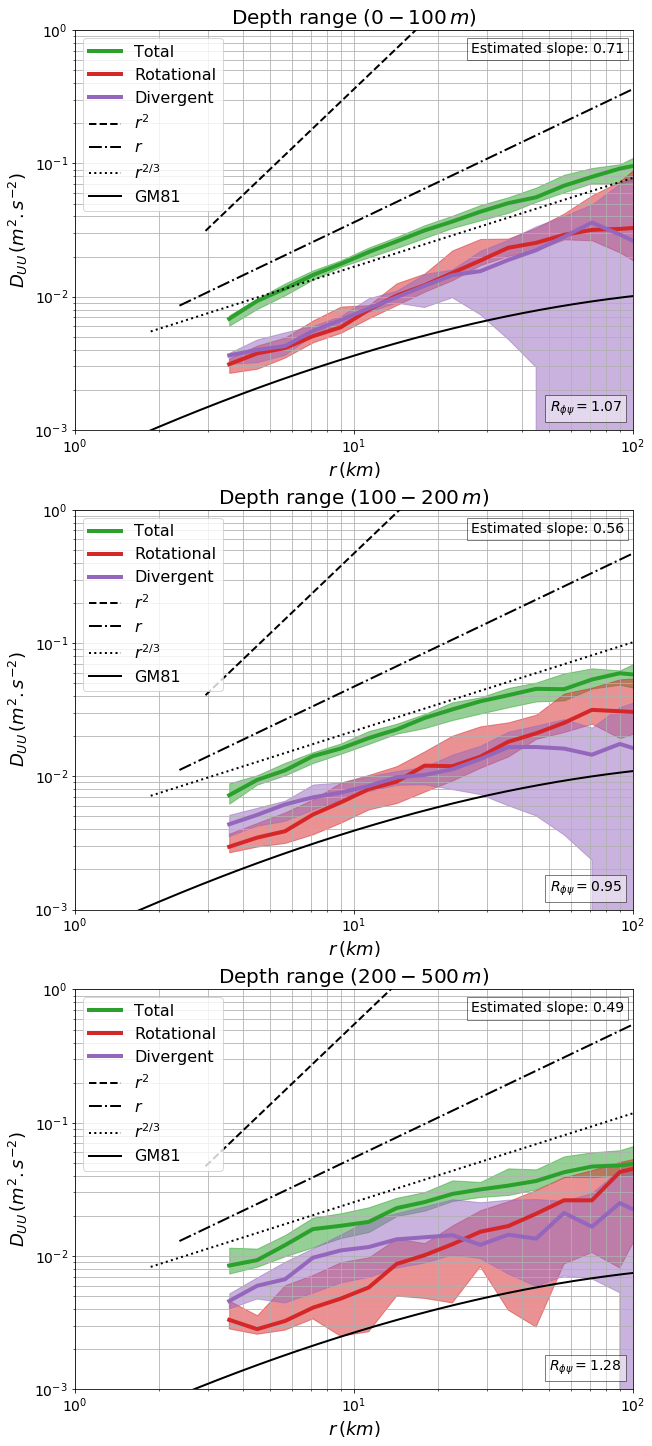

In [10]:
region='NCAL'
D2_NCAL = xr.open_dataset('/data/RESULTS/STRUCTURE_FUNCTIONS/VELOCITY/%s_velocity_structure_function.nc' %region)
plot_D2_over_depth_ranges(D2_NCAL, profiles.sel(region=region), r_bins=slice(3, 2e2), xlim=[1, 1e2])
plt.savefig('../Figures/3a_NCAL_helmholtz_decomposition.png', dpi=300, bbox_inches='tight')

# Vauban Channel

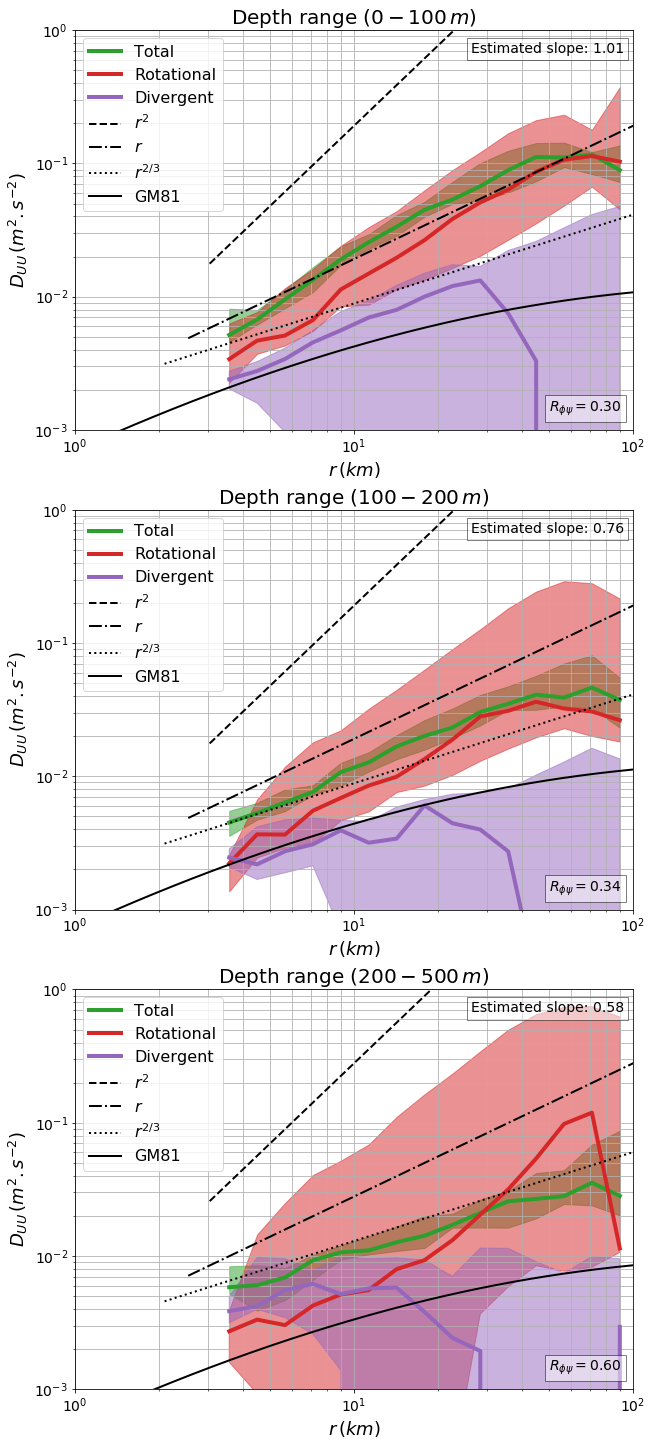

In [11]:
region='VAUB'
D2_VAUB = xr.open_dataset('/data/RESULTS/STRUCTURE_FUNCTIONS/VELOCITY/%s_velocity_structure_function.nc' %region)
plot_D2_over_depth_ranges(D2_VAUB, profiles.sel(region=region), r_bins=slice(3, 1e2), xlim=[1, 1e2])
plt.savefig('../Figures/2a_VAUB_helmholtz_decomposition.png', dpi=300, bbox_inches='tight')

# East of New Caledonia

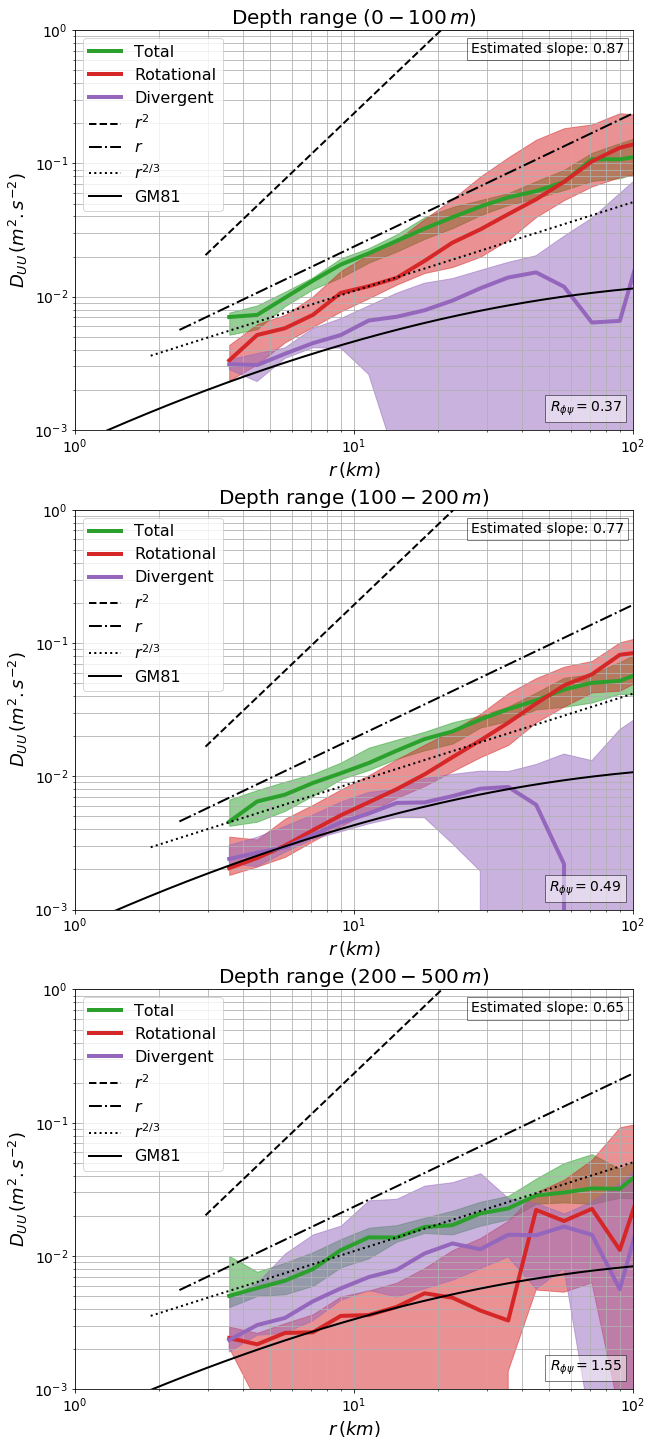

In [12]:
region='ECAL'
D2_ECAL = xr.open_dataset('/data/RESULTS/STRUCTURE_FUNCTIONS/VELOCITY/%s_velocity_structure_function.nc' %region)
plot_D2_over_depth_ranges(D2_ECAL, profiles.sel(region=region), r_bins=slice(3, 2e2), xlim=[1, 1e2])
plt.savefig('../Figures/2b_ECAL_helmholtz_decomposition.png', dpi=300, bbox_inches='tight')

# Southern Caledonia

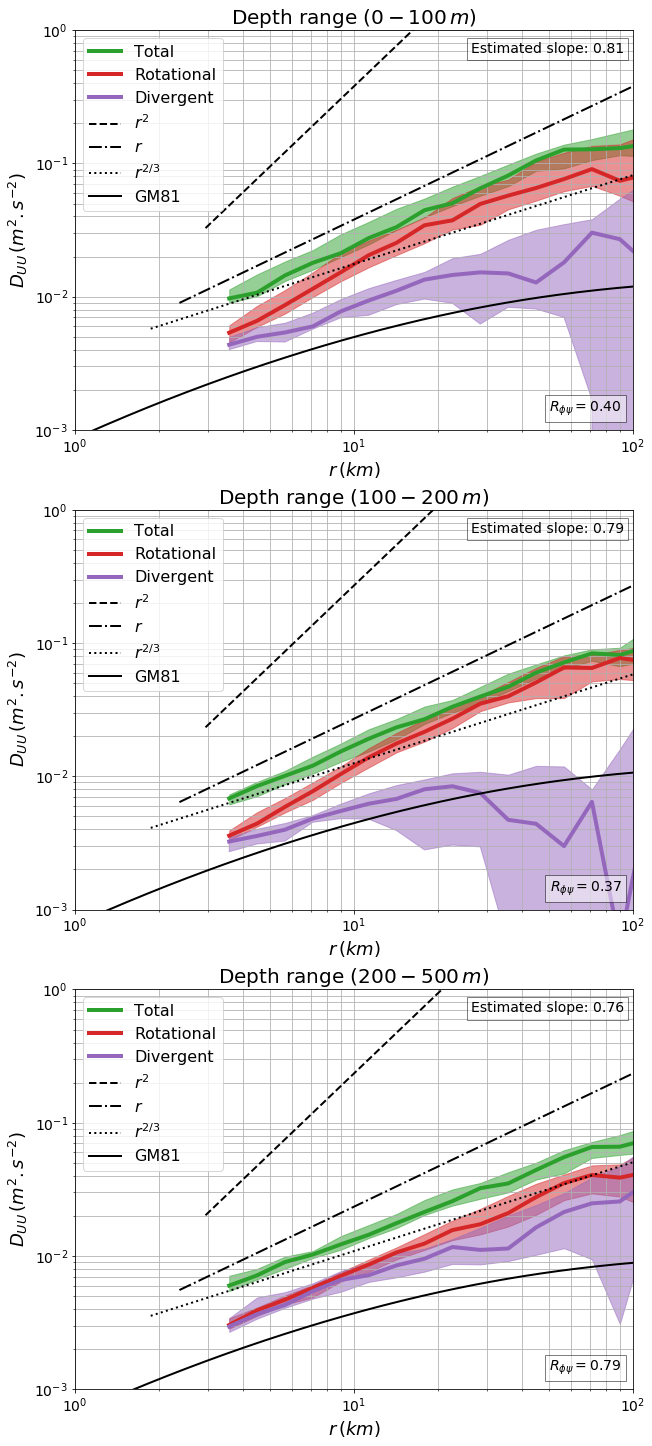

In [13]:
region='SCAL'
D2_SCAL = xr.open_dataset('/data/RESULTS/STRUCTURE_FUNCTIONS/VELOCITY/%s_velocity_structure_function.nc' %region)
plot_D2_over_depth_ranges(D2_SCAL, profiles.sel(region=region), r_bins=slice(3, 2e2), xlim=[1, 1e2])
plt.savefig('../Figures/3b_SCAL_helmholtz_decomposition.png', dpi=300, bbox_inches='tight')

In [14]:
%%system
montage ../Figures/2*VAUB*.png ../Figures/2*ECAL*.png -geometry 1024x3072 -tile 2x1 -quality 100 ../Figures/Fig_2-VAUB_ECAL_structure_functions.png
montage ../Figures/3*NCAL*.png ../Figures/3*SCAL*.png -geometry 1024x3072 -tile 2x1 -quality 100 ../Figures/Fig_3-NCAL_SCAL_structure_functions.png
convert ../Figures/Fig_2-VAUB_ECAL_structure_functions.png -trim -bordercolor White -border 20x10 +repage ../Figures/Fig_2-VAUB_ECAL_structure_functions.png
convert ../Figures/Fig_3-NCAL_SCAL_structure_functions.png -trim -bordercolor White -border 20x10 +repage ../Figures/Fig_3-NCAL_SCAL_structure_functions.png

[]

In [15]:
def get_D2_by_season(D2, season='DJF'):
    D2_by_season = dict(D2.groupby('time.season'))
    return D2_by_season[season]

In [16]:
def compute_slope(D2, depth_bins=range(0, 500, 30), r_slice=slice(3, 2e2)):
    import dask.array as da
    from xscale.signal.fitting import linreg
    from xscale.spectral.tools import fit_power_law, plot_power_law 
    D2_resample = resample_with_depth(D2, depth_bins).sel(r_bins=r_slice)
    slopes = np.nan * np.ones((D2_resample.sizes['depth'], D2_resample.sizes['segment']))
    for z in range(D2_resample.sizes['depth']):
        for s in range(D2_resample.sizes['segment']):
            D2_seg = D2_resample.isel(segment=s, depth=z).dropna('r_bins').chunk()
            if D2_seg.sizes['r_bins'] > 0:
                #slope = linreg(D2_log_seg, dim='r', coord=da.log(D2_log_seg['r'])).sel(degree=1)
                power, scale_factor = fit_power_law(D2_seg['r_bins'], D2_seg['D2t'] + D2_seg['D2l'])
                slopes[z, s] = power
    slope_array = xr.DataArray(slopes, dims=('depth', 'segment'), 
                        coords={'depth': D2_resample['depth'], 
                                'segment': D2_resample['segment'],
                                'time': D2_resample['time']})
    valid_slopes = slope_array.where(slope_array > 0.2)
    return valid_slopes

In [17]:
def resample_with_depth(D2, depth_bins=range(0, 500, 25)):
    depth_labels = depth_bins[1:] - np.diff(depth_bins) / 2
    D2_resample = D2.sel(r_bins=slice(0,100)).groupby_bins('depth', depth_bins, labels=depth_labels).mean('depth').rename({'depth_bins': 'depth'})
    return D2_resample

In [18]:
D2_NCAL_slopes = compute_slope(D2_NCAL)
D2_ECAL_slopes = compute_slope(D2_ECAL)
D2_VAUB_slopes = compute_slope(D2_VAUB)
D2_SCAL_slopes = compute_slope(D2_SCAL)
#2_resample = resample_with_depth(D2_VANU)

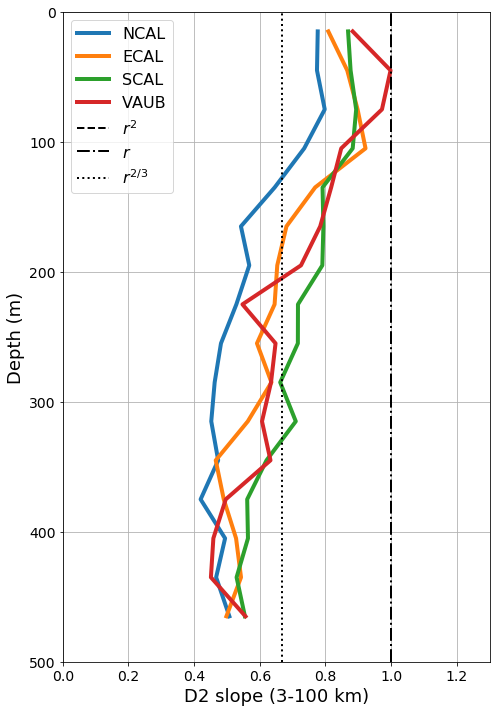

In [19]:
plt.figure(figsize=(7, 10))
D2_NCAL_slopes.median('segment').plot(y='depth', lw=4, label='NCAL')
D2_ECAL_slopes.median('segment').plot(y='depth', lw=4, label='ECAL')
D2_SCAL_slopes.median('segment').plot(y='depth', lw=4, label='SCAL')
D2_VAUB_slopes.median('segment').plot(y='depth', lw=4, label='VAUB')
plt.gca().invert_yaxis()
plt.grid()
ax = plt.gca()
ax.set_xlim([0, 1.3])
ax.set_ylim([500, 0])
ylim = ax.get_ylim()
plt.plot([2, 2], ylim, lw=2, ls='--', color='black', label=r'$r^2$')
plt.plot([1., 1.], ylim, lw=2, ls='-.', color='black', label=r'$r$')
plt.plot([2./3, 2./3], ylim, lw=2, ls=':', color='black', label=r'$r^{2/3}$')
ax.set_xlabel('D2 slope (3-100 km)')
ax.set_ylabel('Depth (m)')
plt.legend()
plt.tight_layout()
plt.savefig('../Figures/4a_SF_slopes.png', dpi=300, bbox_inches='tight')

In [ ]:
def compute_slope(D2, depth_bins=range(0, 500, 30), r_slice=slice(3, 2e2)):
    import dask.array as da
    from xscale.signal.fitting import linreg
    from xscale.spectral.tools import fit_power_law, plot_power_law 
    D2_resample = resample_with_depth(D2, depth_bins).sel(r_bins=r_slice)
    slopes = np.nan * np.ones((D2_resample.sizes['depth'], D2_resample.sizes['segment']))
    for z in range(D2_resample.sizes['depth']):
        for s in range(D2_resample.sizes['segment']):
            D2_seg = D2_resample.isel(segment=s, depth=z).dropna('r_bins').chunk()
            if D2_seg.sizes['r_bins'] > 0:
                #slope = linreg(D2_log_seg, dim='r', coord=da.log(D2_log_seg['r'])).sel(degree=1)
                power, scale_factor = fit_power_law(D2_seg['r_bins'], D2_seg['D2t'] + D2_seg['D2l'])
                slopes[z, s] = power
    slope_array = xr.DataArray(slopes, dims=('depth', 'segment'), 
                        coords={'depth': D2_resample['depth'], 
                                'segment': D2_resample['segment'],
                                'time': D2_resample['time']})
    valid_slopes = slope_array.where(slope_array > 0.2)
    return valid_slopes

## East of New Caledonia by season

In [81]:
def plot_D2_by_season(D2, r_bins=slice(3, 1e2), xlim=[1, 1e2]):
    plt.figure(figsize=(10, 20))
    D2_surf = get_D2_over_depth_range(D2, depth_range=slice(0, 50), min_obs=300)
    D2_surf_by_season = dict(D2_surf.groupby('time.season')) 
    D2_surf_summer = xr.concat((D2_surf_by_season['JJA'], 
                                D2_surf_by_season['SON']), 
                               dim='segment')
    D2_surf_winter = xr.concat((D2_surf_by_season['DJF'], 
                                D2_surf_by_season['MAM']), 
                               dim='segment')
    plt.subplot(211)
    plot_helmholtz_decomposition(D2_surf_summer.sel(r_bins=r_bins), xlim=xlim)
    plt.title('Summer')
    plt.subplot(212)
    plot_helmholtz_decomposition(D2_surf_winter.sel(r_bins=r_bins), xlim=xlim)
    plt.title('Winter')

/Users/serazin/anaconda3/envs/jplab/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/serazin/anaconda3/envs/jplab/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/serazin/anaconda3/envs/jplab/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/serazin/anaconda3/envs/jplab/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/serazin/anaconda3/envs/jplab/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/serazin/anaconda3/envs/jplab/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dt

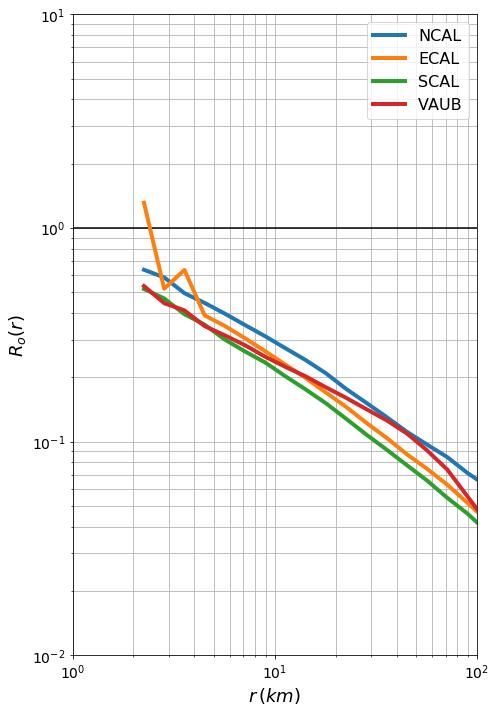

In [278]:
plt.figure(figsize=(7, 10))
plot_Rossby_radius(D2_ECAL.median('depth'), 
                   lat=profiles.sel(region='NCAL').lat_mean, label='NCAL') 
plot_Rossby_radius(D2_NCAL.median('depth'), 
                   lat=profiles.sel(region='ECAL').lat_mean, label='ECAL')
plot_Rossby_radius(D2_SCAL.median('depth'), 
                   lat=profiles.sel(region='SCAL').lat_mean, label='SCAL')
plot_Rossby_radius(D2_VAUB.median('depth'), 
                   lat=profiles.sel(region='VAUB').lat_mean, label='VAUB')
plt.legend()
plt.hlines(1, 0, 100)
plt.grid(which='both')
plt.ylim([1e-2, 10])
plt.tight_layout()
plt.savefig('../Figures/4b_Rossby_number.png', dpi=300, bbox_inches='tight')

In [20]:
%%system
montage ../Figures/4a*.png ../Figures/4b*.png -geometry 1024x2048 -tile 2x1 -quality 100 ../Figures/Fig_4-VSF_slope_and_Rossby.png
convert ../Figures/Fig_4-VSF_slope_and_Rossby.png -trim -bordercolor White -border 20x10 +repage ../Figures/Fig_4-VSF_slope_and_Rossby.png

[]